In [1]:
from IPython.display import Image

---------
# Cloning Confirmation Tests

# Raw Data

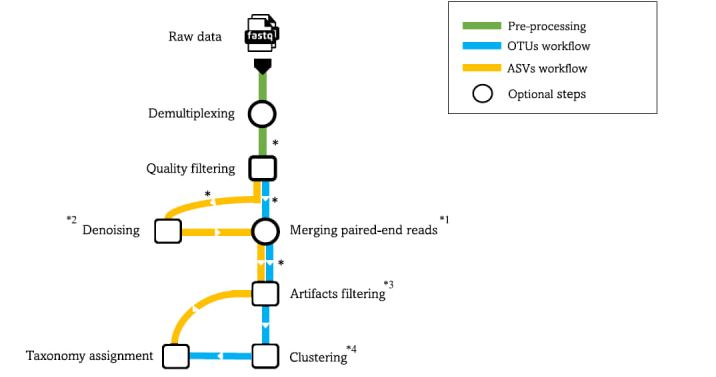

In [3]:
Image("D:\Documents\Alabuga\Cloning\Bioinf_Clone_Check\photo_2024-09-03_11-55-23.jpg")

#### Demultiplexing FASTQ raw data from the MGI sequencer

This can be done with publicly available MGI demultiplexing tool MGIkit.
The tool can be downloaded from the https://sagc-bioinformatics.github.io/mgikit/
You need a Unix style computer with tools installed on the servers for efficient and fast analysis of the big data files. FastQ files should be stored on the servers as well, for data protection.

#### Quality Filtering

Before proceeding with analysis, perform quality control on your FASTQ files using tools like FastQC (https://www.bioinformatics.babraham.ac.uk/projects/fastqc/) to ensure the reads are of high quality.

If necessary, trim adapters and low-quality bases using tools like Trimmomatic or Cutadapt.

Documentation of the tools is available online. 

### Mapping of the genes to the reference genome. 

Should be done based on your species reference genome. For humans (Homo sapiens), it is usually hg38 that is used as a source. Make sure to keep it consistent if the lab is using hg38 as a reference, do not change it for hg19 for other alignments. Same thing applies to other reference genomes. They are not interchangeable.  

It is also recommended to use genomes curated at UCSC so that they can easily visualize data later using the UCSC Genome Browser (http://genome.ucsc.edu/).

Currently, the most used up method for genome RNA-seq alignemnt is STAR (https://github.com/alexdobin/STAR). It is fast and efficient, but uses a lot of RAM memory. This should be fine in a good bioinformatics lab. 

    
Other tools that can be used are:

- Bowtie (https://bowtie-bio.sourceforge.net/index.shtml)
- Bowtie2 (https://bowtie-bio.sourceforge.net/bowtie2/index.shtml)
- BWA (Burrows-Wheeler Alignment algorithm) 

For splice site reads, other tools can be used, such as:

- STAR (mentioned above)
- TopHat (https://ccb.jhu.edu/software/tophat/index.shtml)

#### Conversion to BAM files

It is always good to convert, index and sort SAM files into BAM. 

SAMtools and its documentation is available online (https://github.com/samtools/samtools?tab=readme-ov-file), available for Unix/Linux/MacOS. 

## Variant Calling

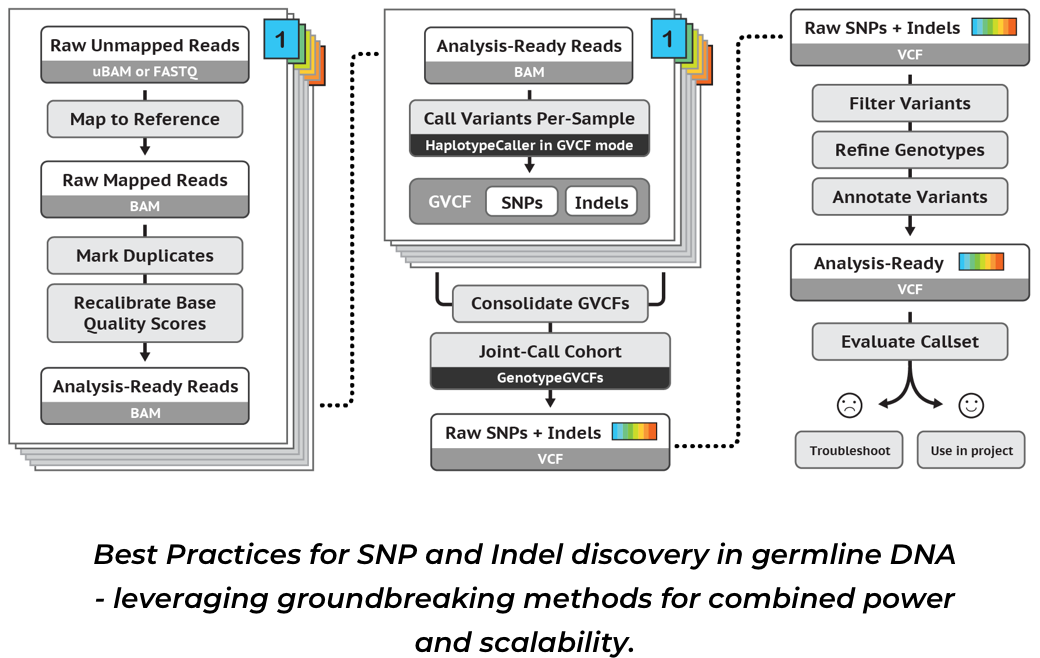

In [23]:
Image("D:\Documents\Alabuga\Cloning\Bioinf_Clone_Check\pipelines-image.png", retina=True)

Variant calling is used to idenitfy indels and SNPs in the sequencing data.

One of the more populat tools is GATK (https://github.com/broadinstitute/gatk). It includes samtools library. Available for Unix/Linux/macOS. 

### Comparing samples between each other

In order to compare the SNPs and indels between 2 samples and confirm or deny succsessful cloning, some tools would include: 

bcftools (https://samtools.github.io/bcftools/)

vcftools (https://vcftools.github.io/index.html)

All documentation can be found online on the listed websites.

### Vizualization

Integrative genomics viewer is a great tool for visualization, analysis, and exploration of genomic data. Documentation and download file can be found here: https://igv.org/doc/desktop/#

# Short Tandem Repeat (STR)

Short Tandem Repeat (STR) analysis is needed when comparing two different DNA samples because STR regions are highly variable between individuals, making them ideal for distinguishing between DNA profiles. STRs are short sequences of DNA (usually 2-6 base pairs long) that are repeated multiple times in a row at specific locations (loci) on the genome. The number of repeats at these loci can vary greatly between individuals.


Bioinformatics pipeline that inspects STRs is https://github.com/AnJingwd/STRsearch

STR are difficult to analyse, similar to telomeres and other repeating units, due to the back-mapping. In order to get a good STR analysis you need a concise read length of the sequencing machine, as well as potential adjustment to the sequencing procedure. 

In case reads cannot be mapped to other genomes besides human ones, other pipelines should be used. 

Bibliography:

Wang, Dong, et al. “STRsearch: A new pipeline for targeted profiling of short tandem repeats in massively parallel sequencing data.” Hereditas, vol. 157, no. 1, 16 Mar. 2020, https://doi.org/10.1186/s41065-020-00120-6.

# Phylogenetic Trees Construction (optional)

Alignment and tree reconstruction can be done using Seaview (https://doua.prabi.fr/software/seaview). 
SeaView drives the alignment programs Muscle or ClustalW for multiple sequence alignment and computes phylogenetic trees using parsimony, distance-based algorithms and maximum likelihood.

Visualization of the trees I think can be done better with FigTree program (http://tree.bio.ed.ac.uk/software/figtree/). 

Constructions of phylogenetic trees might serve as a good tool to check similarities between multiple clones. If we are comparing just 2 clones with each other, I do not think it is very useful. 

# Methylation Profling

Analyzing DNA methylation patterns can determine epigenetic differences between the cloned animal and its donor.

In order to analyse DNA methylation patterns special bisulfate sequencing is needed. Bisulfite sequencing (BS-Seq) or whole-genome bisulfite sequencing (WGBS) is a well-established protocol to detect methylated cytosines in genomic DNA . In this method, genomic DNA is treated with sodium bisulfite and then sequenced, providing single-base resolution of methylated cytosines in the genome. Typically those protocols are available for all current day sequencing machines. 

### Bismark Tool

Bismark is a program to map bisulfite treated sequencing reads to a genome of interest and perform methylation calls in a single step. The program can be obtained at https://github.com/FelixKrueger/Bismark and is compiled in Perl. The output can be easily imported into a genome viewer, such as SeqMonk (https://www.bioinformatics.babraham.ac.uk/projects/seqmonk/), and enables a researcher to analyse the methylation levels of their samples straight away. It's main features are:

- Bisulfite mapping and methylation calling in one single step
- Supports single-end and paired-end read alignments
- Supports ungapped, gapped or spliced alignments
- Alignment seed length, number of mismatches etc. are adjustable
- Output discriminates between cytosine methylation in CpG, CHG and CHH context

### MethylKit tool

Second option is to use Bioconductor R package methylKit.  The package is designed to deal with sequencing data from RRBS and its variants, but also target-capture methods and whole genome bisulfite sequencing. It also has functions to analyze base-pair resolution 5hmC data from experimental protocols such as oxBS-Seq and TAB-Seq. Methylation calling can be performed directly from Bismark aligned BAM files.

Installation and proper package documentation is avaliable online (https://www.bioconductor.org/packages/release/bioc/html/methylKit.html)

It is important to not that DNA methylation patterns might differ between the development stages of the species. Proper literature analysis should be done prior to drawing any conclusions about the differences between the clone, donor and surrogate animal. 

# Transcriptome Analysis

Evaluation of the gene expression profiles through RNA sequencing to compare the expression patterns between the cloned animal, donor, and surrogate mother.

### WGCNA

One of the most popular tools to compare expression patterns is Weighted Correlation Network Analysis for bulk RNA-seq data. Correlation networks are increasingly being used in bioinformatics applications. For example, weighted gene co-expression network analysis is a systems biology method for describing the correlation patterns among genes across microarray samples. Weighted correlation network analysis (WGCNA) can be used for finding clusters (modules) of highly correlated genes, for summarizing such clusters using the module eigengene or an intramodular hub gene, for relating modules to one another and to external sample traits (using eigengene network methodology), and for calculating module membership measures. Correlation networks facilitate network based gene screening methods that can be used to identify candidate biomarkers or therapeutic targets. 

By comparing all RNA-seq gene profiles between all tissue samples for similar gene expression patterns WGCNA can be helpful in establishing similarties between all samples. The documentation for the R package as well as the tool itself can be found at https://cran.r-project.org/web/packages/WGCNA/index.html

### GWAS Analysis

Gene Set Enrichment Analysis (GSEA) is a computational method used to determine whether a predefined set of genes shows statistically significant differences in expression between two biological states (e.g., phenotypes, samples, conditions, or treatments). It is a highly popular method for analysing GO enrichment and corresponding genetic expression of the samples. 

The tool can be found at https://www.gsea-msigdb.org/gsea/index.jsp

Documentation is available online as well.